In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
data = fetch_california_housing()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [5]:
df['Price'] = data.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<Axes: >

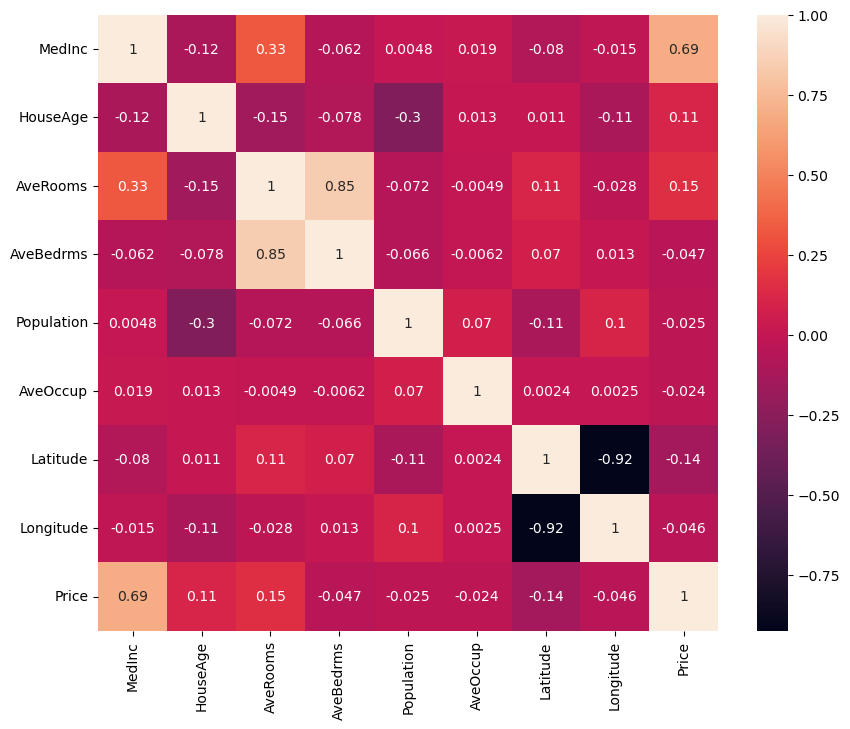

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
vif = pd.DataFrame()
vif['Features'] = df.columns[:len(df.columns) - 1]

In [18]:
vif

,Features
0,MedInc
1,HouseAge
2,AveRooms
3,AveBedrms
4,Population
5,AveOccup
6,Latitude
7,Longitude


In [19]:
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns) - 1)]

In [20]:
vif

,Features,VIF
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211


In [21]:
df1 = df.copy()

In [23]:
df1.drop(['Longitude','Price'], axis = 1, inplace = True)

In [24]:
df1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85


In [25]:
vif = pd.DataFrame()
vif['Features'] = df1.columns
vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]
vif

,Features,VIF
0,MedInc,9.865861
1,HouseAge,6.880512
2,AveRooms,42.192223
3,AveBedrms,39.768396
4,Population,2.793169
5,AveOccup,1.094908
6,Latitude,22.498755


In [26]:
df2 = df1.copy()
df2.drop('AveRooms', axis = 1, inplace = True)
df2.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude
0,8.3252,41.0,1.023810,322.0,2.555556,37.88
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86
2,7.2574,52.0,1.073446,496.0,2.802260,37.85
3,5.6431,52.0,1.073059,558.0,2.547945,37.85
4,3.8462,52.0,1.081081,565.0,2.181467,37.85


In [27]:
vif = pd.DataFrame()
vif['Features'] = df2.columns
vif['VIF'] = [variance_inflation_factor(df2.values, i) for i in range(len(df2.columns))]
vif

,Features,VIF
0,MedInc,5.036342
1,HouseAge,6.660725
2,AveBedrms,6.430073
3,Population,2.752356
4,AveOccup,1.094801
5,Latitude,21.922515


In [29]:
df3 = df2.copy()
df3.drop('Latitude', axis = 1, inplace = True)
df3.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup
0,8.3252,41.0,1.023810,322.0,2.555556
1,8.3014,21.0,0.971880,2401.0,2.109842
2,7.2574,52.0,1.073446,496.0,2.802260
3,5.6431,52.0,1.073059,558.0,2.547945
4,3.8462,52.0,1.081081,565.0,2.181467


In [30]:
vif = pd.DataFrame()
vif['Features'] = df3.columns
vif['VIF'] = [variance_inflation_factor(df3.values, i) for i in range(len(df3.columns))]
vif

,Features,VIF
0,MedInc,3.801038
1,HouseAge,3.769898
2,AveBedrms,4.263506
3,Population,2.222516
4,AveOccup,1.094644


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size = .3, random_state = 1)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 